In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import yfinance as yf
from datetime import datetime, timedelta


In [19]:
stock_list = ["AAPL" , "GOOG" , "MSFT" , "AMZN"]

end = datetime.now()
start = datetime(end.year - 10 ,end.month , end.day )

df = yf.download(stock_list , start , end , group_by="ticker")
df

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\3916246041.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_list , start , end , group_by="ticker")
[*********************100%***********************]  4 of 4 completed


Ticker            GOOG                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2016-01-07   36.243670   36.650121   35.685357   36.049129  59274000   
2016-01-08   36.300240   36.388578   35.384611   35.457561  49018000   
2016-01-11   35.563772   35.675184   34.915133   35.534985  41812000   
2016-01-12   35.815381   36.166250   35.598854   36.033249  40490000   
2016-01-13   36.270468   36.463520   34.670468   34.767242  50034000   
...                ...         ...         ...         ...       ...   
2025-12-30  313.410004  317.700012  313.250000  314.549988  11052500   
2025-12-31  313.369995  315.390015  312.200012  313.799988  10821500   
2026-01-02  317.589996  322.914001  310.649994  315.320007  22043700   
2026-01-05  317.695007  319.250000  315.248993  317.320007  19934000   
2026-01-06  317.309998  321.559998  312.339996  314.549988  18969400   

Ticker            AAPL                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2016-01-07   22.249268   22.576197   21.741963   21.746471  324377600   
2016-01-08   22.219970   22.346232   21.816380   21.861473  283192000   
2016-01-11   22.314665   22.334956   21.947149   22.215458  198957600   
2016-01-12   22.670904   22.702469   22.285350   22.537876  196616800   
2016-01-13   22.619048   22.815206   21.938132   21.958424  249758400   
...                ...         ...         ...         ...        ...   
2025-12-30  272.809998  274.079987  272.279999  273.079987   22139600   
2025-12-31  273.059998  273.679993  271.750000  271.859985   27293600   
2026-01-02  272.260010  277.839996  269.000000  271.010010   37838100   
2026-01-05  270.640015  271.510010  266.140015  267.260010   45647200   
2026-01-06  267.000000  267.549988  262.119995  262.359985   52282100   

Ticker            AMZN                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2016-01-07   31.090000   31.500000   30.260500   30.396999  141498000   
2016-01-08   30.983000   31.207001   30.299999   30.352501  110258000   
2016-01-11   30.624001   30.992500   29.928499   30.886999   97832000   
2016-01-12   31.262501   31.299500   30.612000   30.894501   94482000   
2016-01-13   31.044001   31.044001   28.958000   29.090500  153104000   
...                ...         ...         ...         ...        ...   
2025-12-30  231.210007  232.770004  230.199997  232.529999   21910500   
2025-12-31  232.910004  232.990005  230.119995  230.820007   24383700   
2026-01-02  231.339996  235.460007  224.699997  226.500000   51456200   
2026-01-05  228.839996  234.000000  227.179993  233.059998   49733300   
2026-01-06  232.100006  243.179993  232.070007  240.929993   53667800   

Ticker            MSFT                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2016-01-07   46.144679   46.836412   45.593043   45.680603  56564900  
2016-01-08   45.855704   46.652510   45.663072   45.820683  48754000  
2016-01-11   45.978315   46.276023   45.058924   45.794437  36943800  
2016-01-12   46.197224   46.494932   45.584299   46.214737  36095500  
2016-01-13   47.107849   47.344264   44.918822   45.216530  66883600  
...                ...         ...         ...         ...       ...  
2025-12-30  485.929993  489.679993  485.500000  487.480011  13944500  
2025-12-31  487.839996  488.140015  483.299988  483.619995  15601600  
2026-01-02  484.390015  484.660004  470.160004  472.940002  25571600  
2026-01-05  474.059998  476.070007  469.500000  472.850006  25250300  
2026-01-06  473.799988

In [20]:
df.columns.names = ["ticker" , "stock info"]

df = df.stack(level=0).rename_axis([ "date","ticker"]).reset_index()

compony_name = {
    "AAPL":"AAPL",
    "GOOG":"GOOG",
    "MSFT":"MSFT",
    "AMZN":"AMZN"
    

}

df["compony_name"] = df["ticker"].map(compony_name)

df

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\2655375049.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack(level=0).rename_axis([ "date","ticker"]).reset_index()


stock info,date,ticker,Open,High,Low,Close,Volume,compony_name
0,2016-01-07,AAPL,22.249268,22.576197,21.741963,21.746471,324377600,AAPL
1,2016-01-07,AMZN,31.090000,31.500000,30.260500,30.396999,141498000,AMZN
2,2016-01-07,GOOG,36.243670,36.650121,35.685357,36.049129,59274000,GOOG
3,2016-01-07,MSFT,46.144679,46.836412,45.593043,45.680603,56564900,MSFT
4,2016-01-08,AAPL,22.219970,22.346232,21.816380,21.861473,283192000,AAPL
...,...,...,...,...,...,...,...,...
10051,2026-01-05,MSFT,474.059998,476.070007,469.500000,472.850006,25250300,MSFT
10052,2026-01-06,AAPL,267.000000,267.549988,262.119995,262.359985,52282100,AAPL
10053,2026-01-06,AMZN,232.100006,243.179993,232.070007,240.929993,53667800,AMZN
10054,2026-01-06,GOOG,317.309998,321.559998,312.339996,314.549988,18969400,GOOG


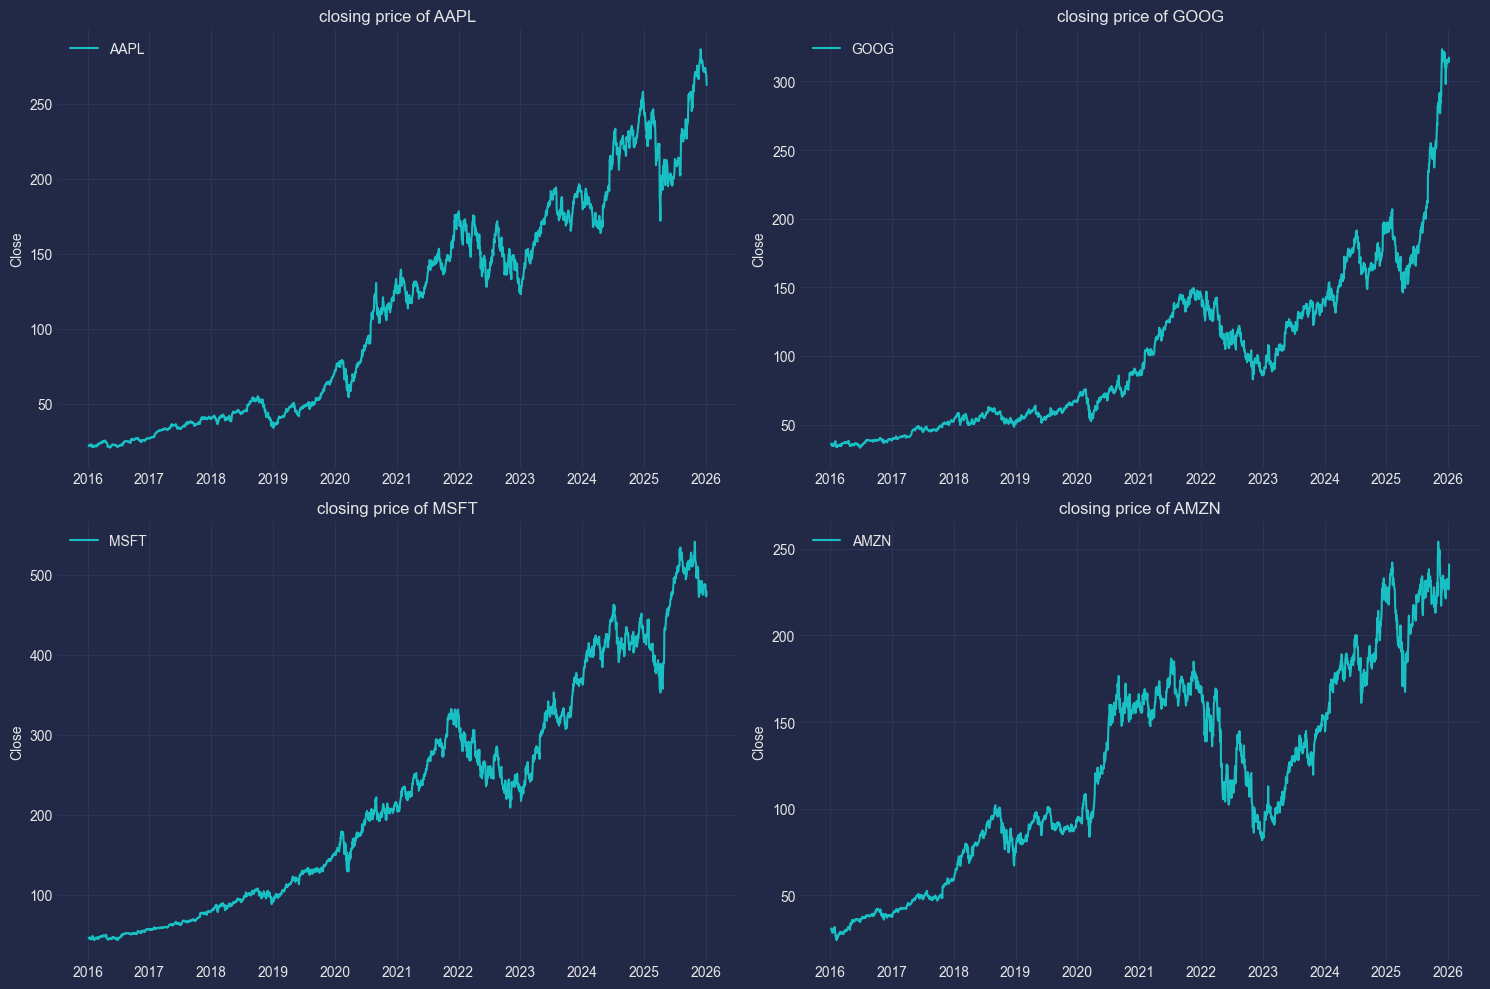

In [24]:
plt.figure(figsize=(15 , 10))
plt.subplots_adjust(top=0.95 , bottom=0.05)

for i , ticker in enumerate(stock_list , 1):
    plt.subplot(2 , 2 , i)
    data = df[df["ticker"]== ticker]
    plt.plot(data["date"] , data["Close"] , label=ticker)
    plt.ylabel("Close")
    plt.title(f"closing price of {ticker}")
    plt.legend()

plt.tight_layout()
plt.show()


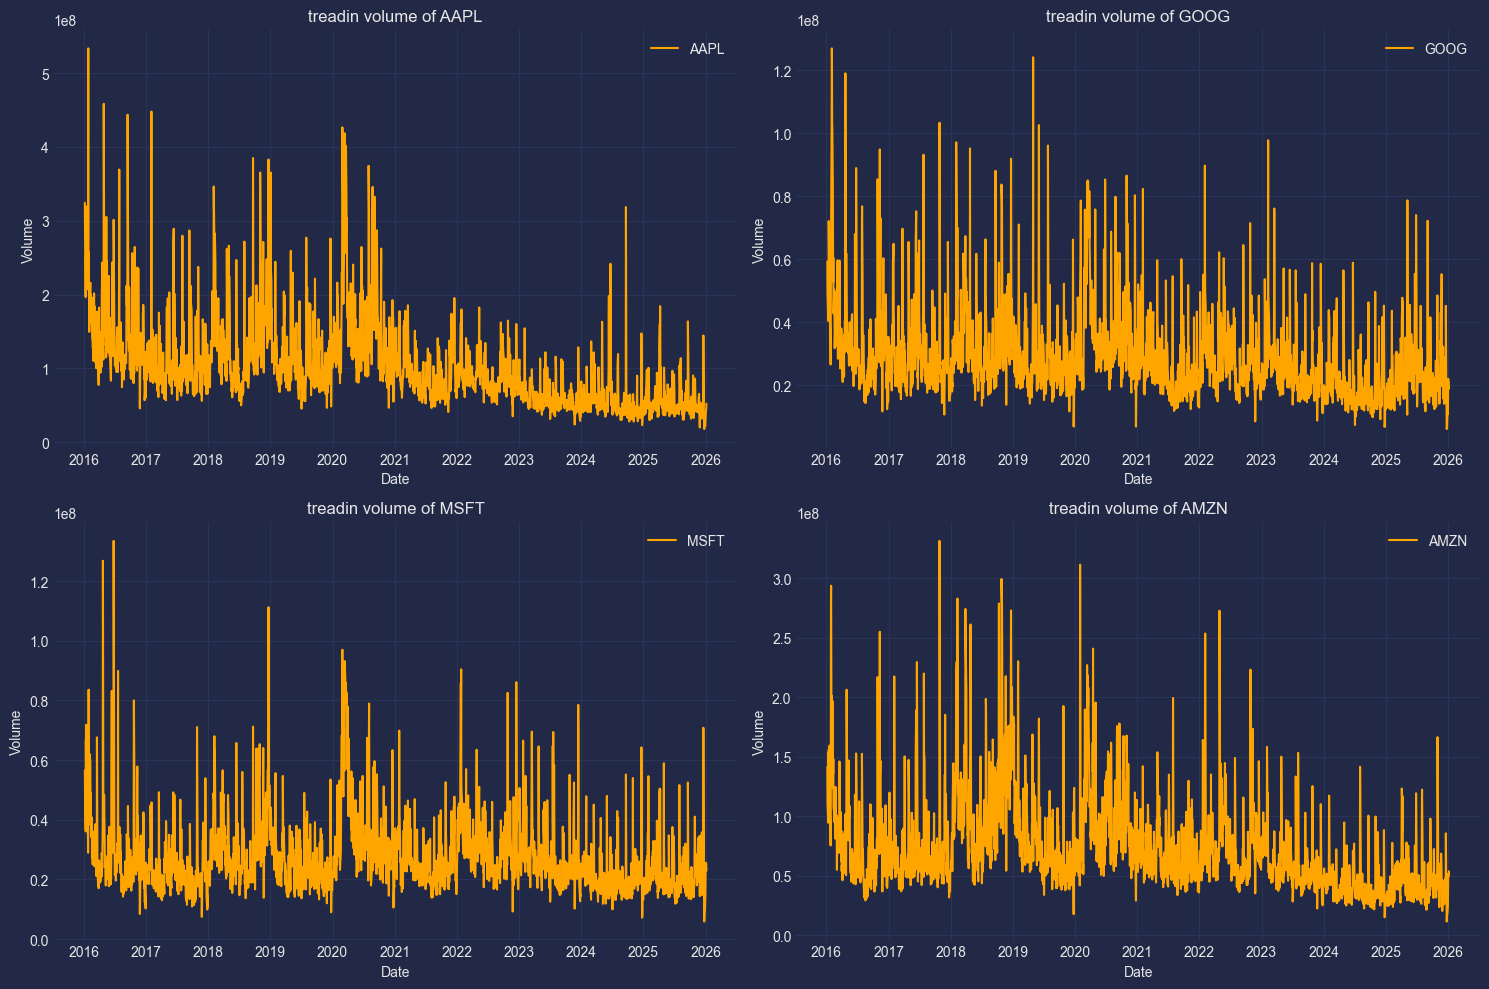

In [28]:
plt.figure(figsize=(15 , 10))
plt.subplots_adjust(top=0.95 , bottom=0.05)

for i , ticker in enumerate(stock_list , 1):
    plt.subplot(2 , 2 , i)
    data = df[df["ticker"] == ticker]
    plt.plot(data["date"] , data["Volume"] , label=ticker , color = "orange" )
    plt.title(f"treadin volume of {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()

plt.tight_layout()
plt.show()


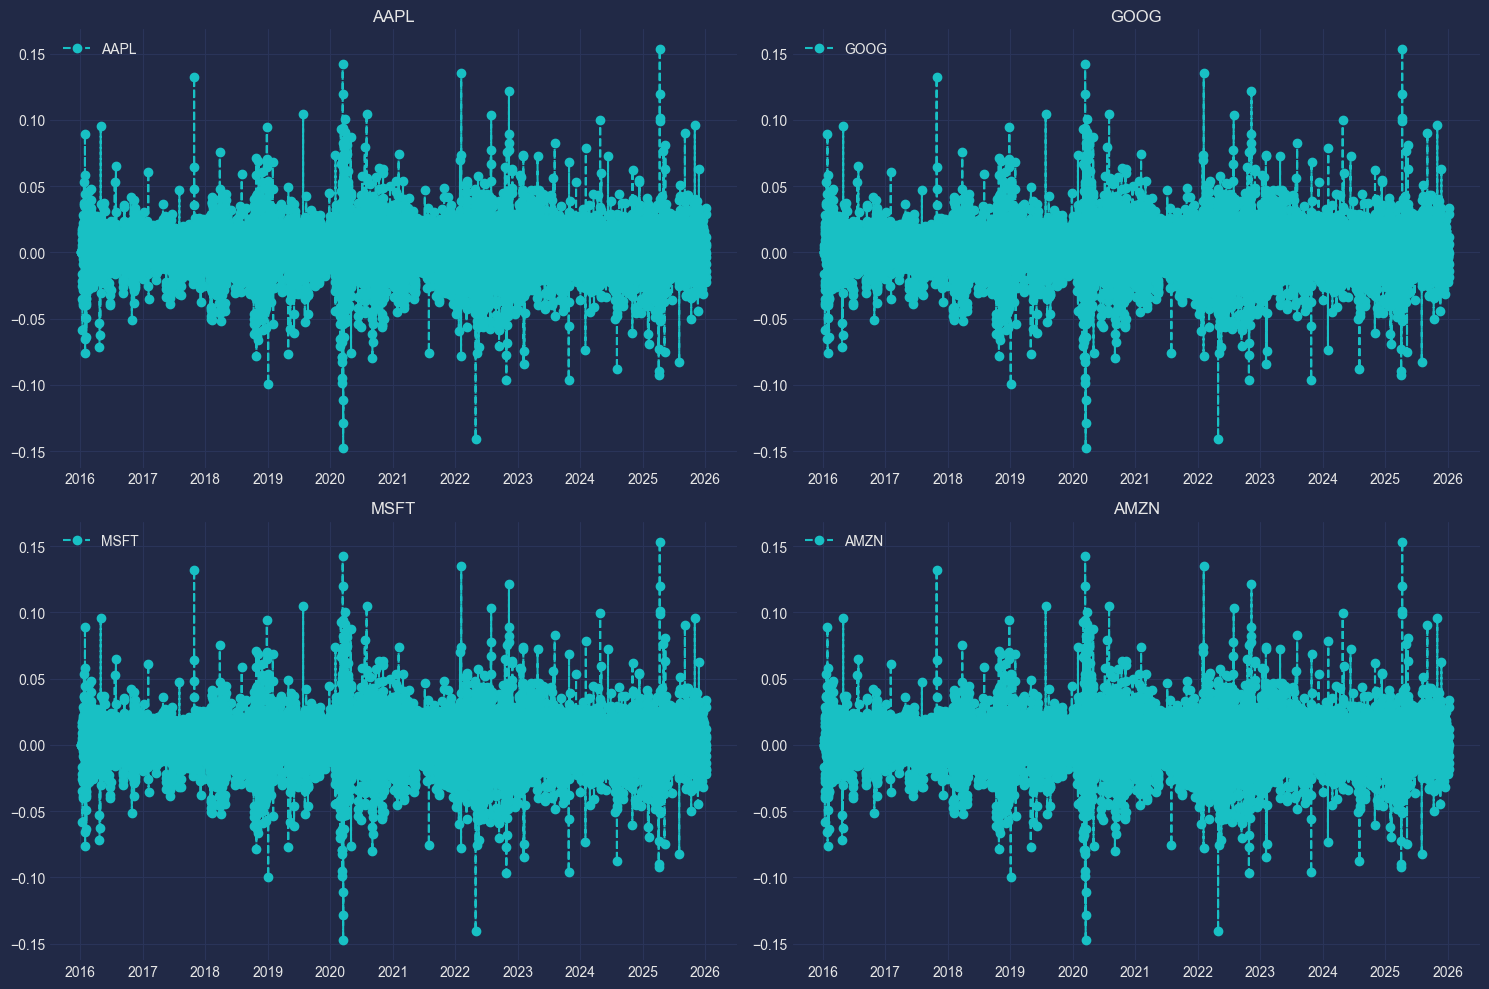

In [35]:
df["daily_return"] = df.groupby("ticker")["Close"].pct_change().fillna(0)


fig , axes = plt.subplots(nrows= 2 , ncols= 2 , figsize = (15 , 10))

for i , ticker in zip(axes.flatten() , stock_list):
    data = df[df["ticker"] == ticker]
    i.plot(df["date"] , df["daily_return"] , linestyle = "--" , marker = "o" , label = ticker)
    i.set_title(ticker)
    i.legend()

plt.tight_layout()
plt.show()





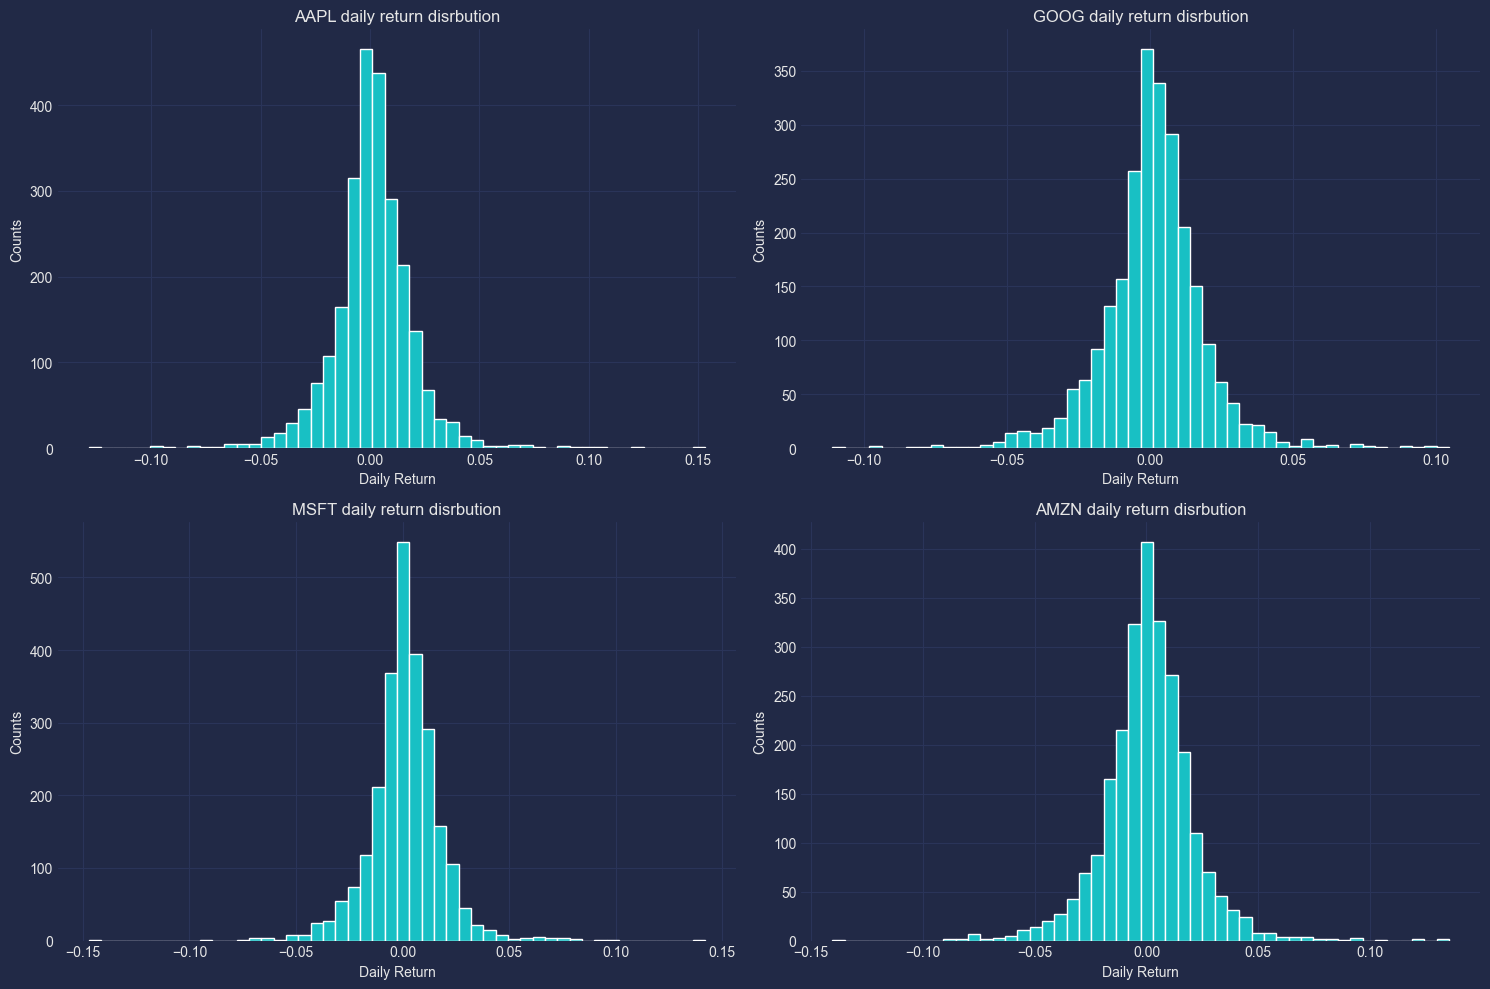

In [38]:
plt.figure(figsize=(15 , 10))

for i , ticker in enumerate(stock_list , 1):
    plt.subplot(2 , 2 , i)
    data = df[df["ticker"] == ticker]
    data["daily_return"].hist(bins=50)
    plt.title(f"{ticker} daily return disrbution")
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [44]:
close_data = yf.download(stock_list , start , end )["Close"]
rets = close_data.pct_change()
rets

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\1523296898.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close_data = yf.download(stock_list , start , end )["Close"]
[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-07,NaN,NaN,NaN,NaN
2016-01-08,0.005288,-0.001464,-0.016410,0.003067
2016-01-11,0.016192,0.017610,0.002184,-0.000573
2016-01-12,0.014513,0.000243,0.014022,0.009178
2016-01-13,-0.025711,-0.058392,-0.035134,-0.021599
...,...,...,...,...
2025-12-30,-0.002484,0.001982,0.000509,0.000780
2025-12-31,-0.004468,-0.007354,-0.002384,-0.007918
2026-01-02,-0.003127,-0.018716,0.004844,-0.022083


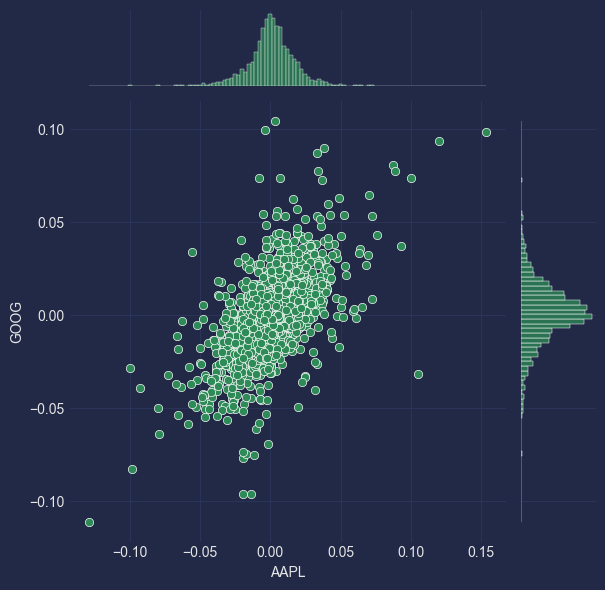

In [46]:
sns.jointplot(x="AAPL" , y= "GOOG" , data = rets , kind= "scatter"  , color="seagreen")


Text(0.5, 1.0, 'stcok return corr')

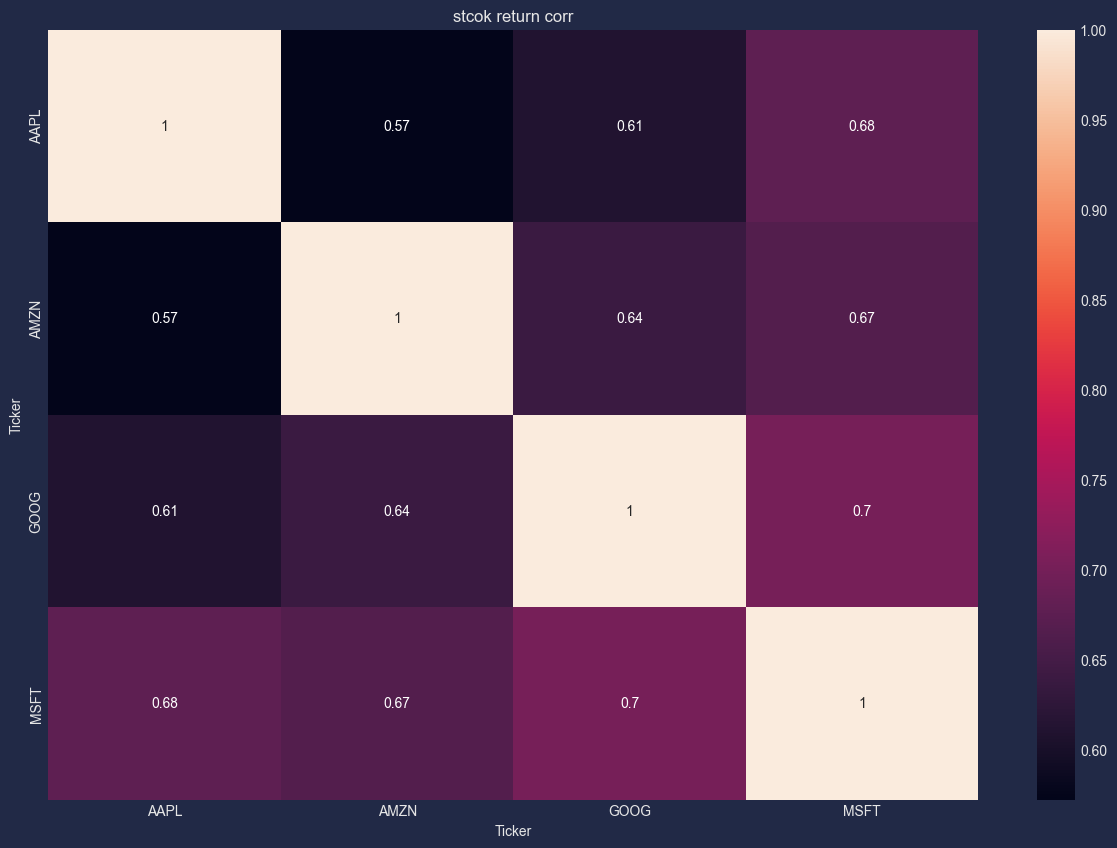

In [47]:
plt.figure(figsize=(15 , 10))

sns.heatmap(rets.corr() , annot= True )
plt.title("stcok return corr")


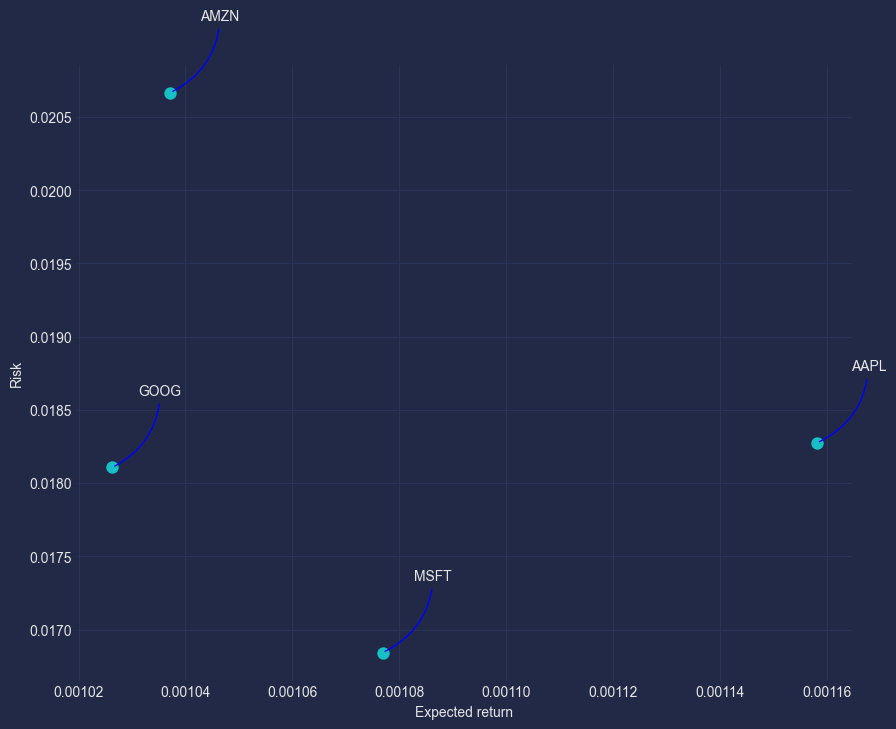

In [49]:
stock_rets = rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(stock_rets.mean(), stock_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(stock_rets.columns, stock_rets.mean(), stock_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [50]:
df = yf.download("AAPL" , start , end )
dataset = df["Close"]
dataset

C:\Users\Amir\AppData\Local\Temp\ipykernel_3160\2599578125.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL" , start , end )
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2016-01-07,21.746487
2016-01-08,21.861469
2016-01-11,22.215456
2016-01-12,22.537874
2016-01-13,21.958420
...,...
2025-12-30,273.079987
2025-12-31,271.859985
2026-01-02,271.010010


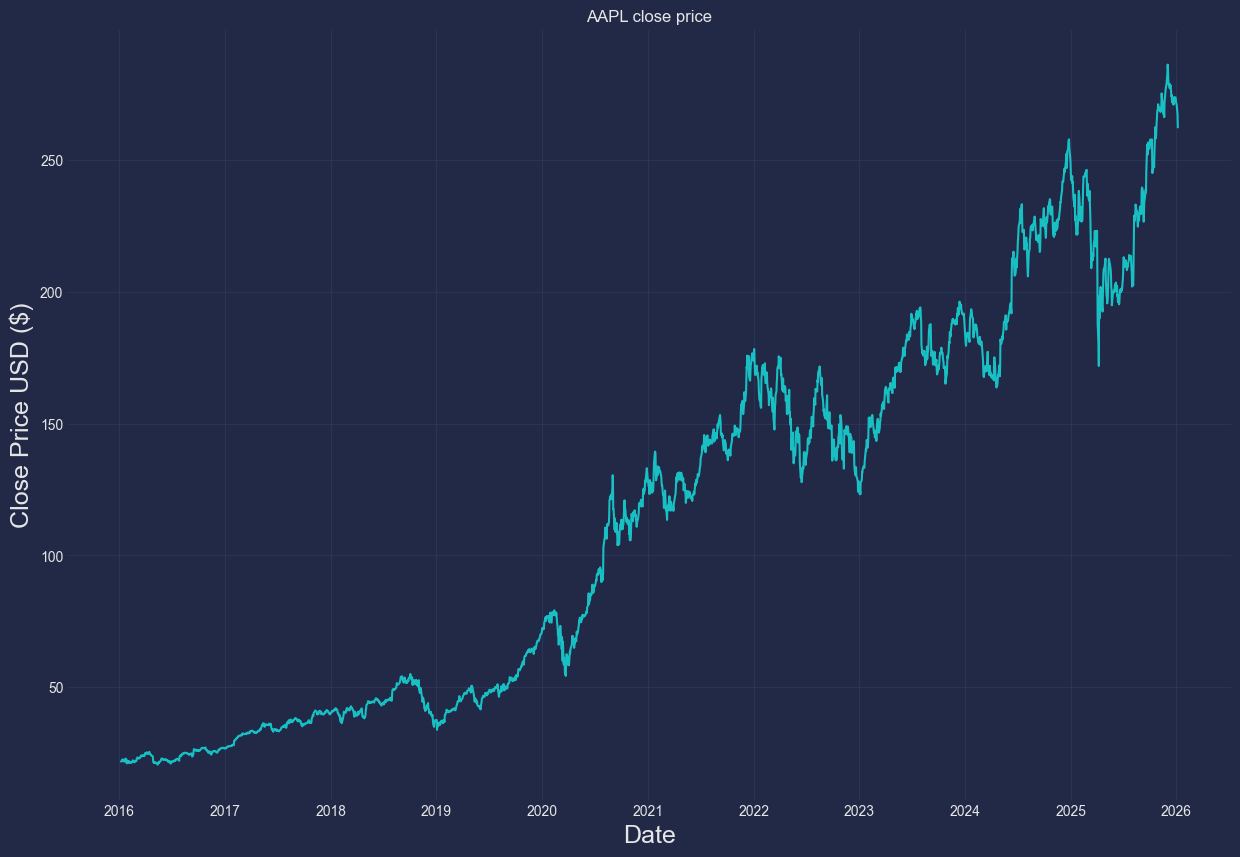

In [51]:
plt.figure(figsize=(15 , 10))

plt.title("AAPL close price")
plt.plot(dataset)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [56]:
dataset= dataset.values

In [57]:
dataset.shape

(2514, 1)

In [58]:
dataset.std()

np.float64(73.45729262869645)

In [59]:
dataset.mean()

np.float64(114.58240365564775)

In [60]:
max(dataset)

array([286.19000244])

In [61]:
min(dataset)

array([20.60407448])

In [66]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [69]:
train_data_len = np.ceil(len(dataset)*0.95)

scaler = MinMaxScaler(feature_range= (0 , 1))



In [71]:
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00430148],
       [0.00473442],
       [0.00606727],
       ...,
       [0.94284338],
       [0.92872366],
       [0.9102738 ]], shape=(2514, 1))

In [81]:
train_data = scaled_data[0:int(train_data_len) , :]

x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60 : i , 0])
    y_train.append(train_data[i , 0])

x_train , y_train = np.array(x_train) , np.array(y_train)

x_train.shape , y_train.shape


((2329, 60), (2329,))

In [82]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1 ))
x_train.shape

(2329, 60, 1)